In [79]:
# import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [104]:
train_data =  tf.keras.utils.image_dataset_from_directory(
    '../dataset/train',  # relative path from your script
    image_size=(48, 48),
    batch_size=32,  #take a batch of size in data contains 32 img
    label_mode="categorical",
    shuffle=True,
    color_mode="grayscale"
)
test_data= tf.keras.utils.image_dataset_from_directory(
    '../dataset/test',
    image_size=(48,48),
    label_mode="categorical",
    color_mode="grayscale",
    
 )
type(test_data)
type(train_data)


Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


tensorflow.python.data.ops.prefetch_op._PrefetchDataset

visualize data 

In [105]:
for image, label in train_data:
    print(label[5])
    print(image.shape)
    print(label.shape)
    break

tf.Tensor([0. 0. 0. 0. 0. 0. 1.], shape=(7,), dtype=float32)
(32, 48, 48, 1)
(32, 7)


**Classe names**

In [106]:
class_name= train_data.class_names

class_name

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

**Affichage des exemples d'images et leur labels**

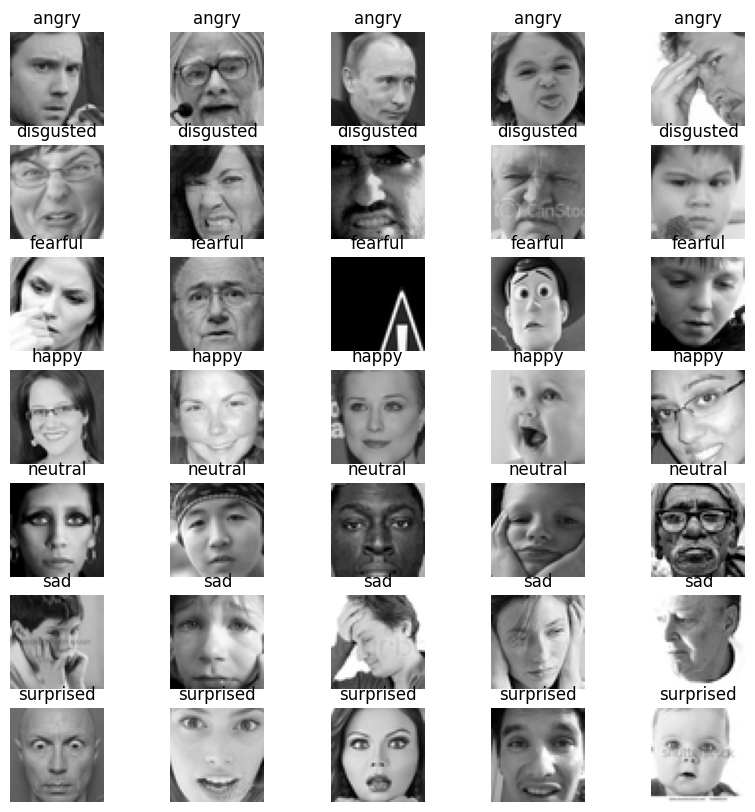

In [107]:
import matplotlib.pyplot as plt
import os
import cv2
plt.figure(figsize=(10, 10))
# for images, labels in train_data.take(1):
#     print(train_data.take(1)) 
img_path= '../dataset/train'
j=1
for category in class_name:
    path= os.path.join(img_path, category)
    i=0
    for img in os.listdir(path):
      if(i<5):
        image_to_show= cv2.imread(os.path.join(path, img))
        plt.subplot(7, 5, j)  # 7 rows, 3 columns, position j
        plt.imshow(image_to_show)
        plt.title(category)
        plt.axis(False)
        i=i+1
        j=j+1
plt.show()


**Bonus : Normaliser, redimensionner et augmenter les images (rotation, zoom, flip).**

In [116]:
for category in class_name:
    path= os.path.join(img_path,category)
    for img in os.listdir(path):
        img_read= cv2.imread(os.path.join(path,img))
        break
        

In [109]:
print(train_data.take(1)) #??

<_TakeDataset element_spec=(TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>


**Entrainement CNN**

**Create model**

In [110]:
model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation="relu",input_shape=(48,48,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation="softmax")
])

c:\Users\hp\Documents\projects\simplon_projects\Detection_demotions_faciales\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [111]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │     2,166,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,135 (8.27 MB)

 Trainable params: 2,168,135 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

In [112]:
y_true=[[0,1,0], [1,0,0]]
y_pred= [[0.05,0.95, 0],[0.8,0.1 , 0.1]]
loss_fct= tf.keras.losses.CategoricalCrossentropy(reduction='none')
los= loss_fct(y_true, y_pred)
print(los)

tf.Tensor([0.05129331 0.22314353], shape=(2,), dtype=float32)


**Optimiser**

In [114]:
model.compile(
    optimizer="adam",
    loss= tf.keras.losses.CategoricalCrossentropy(),
    metrics= ["accuracy"]
)

**Early stopping**

In [115]:
from keras.callbacks import EarlyStopping
early_stop= EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode=min,
    restore_best_weights=True

)
history= model.fit(
    train_data,
    epochs=3,
    validation_data= test_data,
    callbacks=[early_stop]
)

Epoch 1/3


c:\Users\hp\Documents\projects\simplon_projects\Detection_demotions_faciales\env\lib\site-packages\keras\src\callbacks\early_stopping.py:77: UserWarning: EarlyStopping mode '<built-in function min>' is unknown, fallback to auto mode.
  super().__init__(monitor, mode, min_delta=min_delta)


898/898 ━━━━━━━━━━━━━━━━━━━━ 150s 165ms/step - accuracy: 0.2465 - loss: 4.7939 - val_accuracy: 0.2473 - val_loss: 1.8443
Epoch 2/3
898/898 ━━━━━━━━━━━━━━━━━━━━ 93s 104ms/step - accuracy: 0.2515 - loss: 1.8288 - val_accuracy: 0.2473 - val_loss: 1.8231
Epoch 3/3
898/898 ━━━━━━━━━━━━━━━━━━━━ 96s 106ms/step - accuracy: 0.2515 - loss: 1.8163 - val_accuracy: 0.2473 - val_loss: 1.8164
